In [ ]:
!pip install opencv-python
!pip install tensorflow==2.6.0
!pip install tensorflow --upgrade --user
!pip install pip --upgrade --user


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.4/458.4 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 38.5 MB/s eta 0:00:00
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30692 sha256=95b875ce49413ce78f3e6a0b115f4ecbac313ca69c03a399199b040bad518009
  Stored in directory: /root/.cache/pip/wheels/3a/ce/7a/27094f689461801c934296d07078773603663dfcaca63bb064
  Created wheel for term

**Importing required libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import numpy as np
import pathlib
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#assigning directory
directory=pathlib.Path("/content/drive/MyDrive/CT_KIDNEY")

In [ ]:
# Just needed in case you'd like to append it to an array
data = []

for filename in os.listdir("."):
    if filename.endswith("jpeg"):
        # Your code comes here such as
        print(filename)
        data.append(filename)

In [ ]:
#count of images in the directory given
image_count=len(list(directory.glob('*/*.jpg')))
#print(list(directory.glob('/*.jpg')))
image_count

1600

In [ ]:
#creating dictionary of flower species
flower_images_dict={
    "Cyst":list(directory.glob('Cyst/*.jpg')),
    "Normal":list(directory.glob('Normal/*.jpg')),
    "Stone":list(directory.glob('Stone/*.jpg')),
    "Tumor":list(directory.glob('Tumor/*.jpg'))
}

In [ ]:
flower_images_dict

{'Cyst': [PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (10).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (100).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (103).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (102).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (101).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (1).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (108).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (106).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (107).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (105).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (104).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (112).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (111).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (11).jpg'),
  PosixPath('/co

In [ ]:
#Different species list
keys=["Cyst","Normal","Stone","Tumor"]

In [ ]:
#resizing and creating labels using computer vision
count = 0
resized,labels=[],[]
for flower_name,images in flower_images_dict.items():
    for image in images:
        print("completed")
        img=cv2.imread(str(image))
        resized_image=cv2.resize(img,(224,224))
        count=count+1
        print(count)
        resized.append(resized_image)
        labels.append(keys.index(flower_name))
flower_images_dict

completed
1
completed
2
completed
3
completed
4
completed
5
completed
6
completed
7
completed
8
completed
9
completed
10
completed
11
completed
12
completed
13
completed
14
completed
15
completed
16
completed
17
completed
18
completed
19
completed
20
completed
21
completed
22
completed
23
completed
24
completed
25
completed
26
completed
27
completed
28
completed
29
completed
30
completed
31
completed
32
completed
33
completed
34
completed
35
completed
36
completed
37
completed
38
completed
39
completed
40
completed
41
completed
42
completed
43
completed
44
completed
45
completed
46
completed
47
completed
48
completed
49
completed
50
completed
51
completed
52
completed
53
completed
54
completed
55
completed
56
completed
57
completed
58
completed
59
completed
60
completed
61
completed
62
completed
63
completed
64
completed
65
completed
66
completed
67
completed
68
completed
69
completed
70
completed
71
completed
72
completed
73
completed
74
completed
75
completed
76
completed
77
complete

{'Cyst': [PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (10).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (100).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (103).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (102).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (101).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (1).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (108).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (106).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (107).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (105).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (104).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (112).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (111).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (11).jpg'),
  PosixPath('/co

In [ ]:
#function to print images
def print_image(i,j):
    plt.imshow(i)
    plt.title(keys[j])

In [ ]:
#splitting data into train and test
#if any integer is given to random_state it will generate and give same set of data each time we run the code and if we give
#None different sequences will be generated
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(resized,labels,test_size=0.25,random_state=0)

In [ ]:
#normalizing data
x_train_scaled=np.array(x_train)/255
x_test_scaled=np.array(x_test)/255

In [ ]:
x_train_scaled.shape

(1200, 224, 224, 3)

In [ ]:
y_train=np.array(y_train)
y_train.shape

(1200,)

In [ ]:
x_test_scaled.shape

(400, 224, 224, 3)

In [ ]:
y_test=np.array(y_test)
y_test.shape

(400,)

**Callbacks for stopping when the required accuracy is achieved**

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        print("call")
        if(logs.get('accuracy') > .99):
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(99))
            self.model.stop_training = True
callbacks = myCallback()

## **2. CNN Model With Data Augmentation layers and Dropout layers**

# **2.5 Activation function = "Relu" ,Optimizer = "AdaDelta"**

In [ ]:
model2_5=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(4,activation="softmax")
    #layers.Dense(2,kernel_regularizer=l2(0.01),activation="softmax")
])
model2_5.compile(optimizer="adadelta",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
compare2_5 = model2_5.fit(x_train_scaled,np.array(y_train),epochs=10,callbacks=[callbacks])

Epoch 1/10
38/38 [==============================] - 71s 2s/step - loss: 1.3732 - accuracy: 0.2908
Epoch 2/10
38/38 [==============================] - 65s 2s/step - loss: 1.3313 - accuracy: 0.3725
Epoch 3/10
38/38 [==============================] - 67s 2s/step - loss: 1.2963 - accuracy: 0.4358
Epoch 4/10
38/38 [==============================] - 66s 2s/step - loss: 1.2444 - accuracy: 0.4875
Epoch 5/10
38/38 [==============================] - 67s 2s/step - loss: 1.2304 - accuracy: 0.4908
Epoch 6/10
38/38 [==============================] - 67s 2s/step - loss: 1.1996 - accuracy: 0.5383
Epoch 7/10
38/38 [==============================] - 66s 2s/step - loss: 1.1643 - accuracy: 0.5825
Epoch 8/10
38/38 [==============================] - 69s 2s/step - loss: 1.1504 - accuracy: 0.5692
Epoch 9/10
38/38 [==============================] - 67s 2s/step - loss: 1.1227 - accuracy: 0.5883
Epoch 10/10
38/38 [==============================] - 67s 2s/step - loss: 1.1153 - accuracy: 0.5858


In [ ]:
model2_5.evaluate(x_test_scaled,np.array(y_test))

13/13 [==============================] - 4s 319ms/step - loss: 1.0249 - accuracy: 0.6725


[1.0248500108718872, 0.6725000143051147]

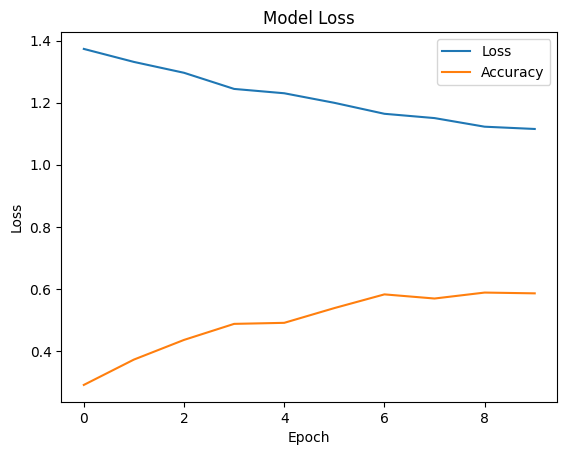

In [ ]:
# Plot training & validation loss values
plt.plot(compare2_5.history['loss'])
plt.plot(compare2_5.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **3. CNN Model with only Dropout layers**

# **3.1 Activation function = "Relu" ,Optimizer = "Adam"**

In [ ]:
model3_1=models.Sequential([
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.6),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.6),
    layers.Dense(32,activation="relu"),
    layers.Dropout(0.6),
    layers.Dense(4,activation="softmax")
])
model3_1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
compare3_1 = model3_1.fit(x_train_scaled,np.array(y_train),epochs=10,callbacks=[callbacks])

Epoch 1/10
38/38 [==============================] - 6s 123ms/step - loss: 3.6898 - accuracy: 0.2483
Epoch 2/10
38/38 [==============================] - 4s 94ms/step - loss: 1.3880 - accuracy: 0.2708
Epoch 3/10
38/38 [==============================] - 3s 92ms/step - loss: 1.3769 - accuracy: 0.2833
Epoch 4/10
38/38 [==============================] - 5s 139ms/step - loss: 1.3580 - accuracy: 0.2942
Epoch 5/10
38/38 [==============================] - 6s 157ms/step - loss: 1.3345 - accuracy: 0.3117
Epoch 6/10
38/38 [==============================] - 4s 93ms/step - loss: 1.3324 - accuracy: 0.3050
Epoch 7/10
38/38 [==============================] - 4s 100ms/step - loss: 1.3307 - accuracy: 0.3117
Epoch 8/10
38/38 [==============================] - 5s 121ms/step - loss: 1.3149 - accuracy: 0.3175
Epoch 9/10
38/38 [==============================] - 6s 162ms/step - loss: 1.3206 - accuracy: 0.3067
Epoch 10/10
38/38 [==============================] - 4s 108ms/step - loss: 1.3000 - accuracy: 0.3150


In [ ]:
model3_1.evaluate(x_test_scaled,np.array(y_test))

13/13 [==============================] - 1s 48ms/step - loss: 1.1597 - accuracy: 0.4425


[1.1596521139144897, 0.4424999952316284]

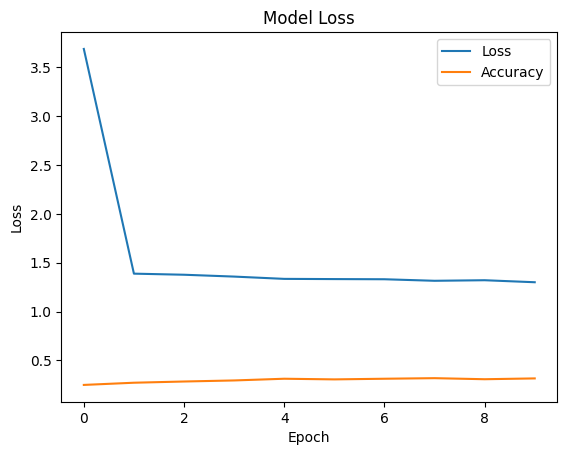

In [ ]:
# Plot training & validation loss values
plt.plot(compare3_1.history['loss'])
plt.plot(compare3_1.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **3.2 Activation function = "Relu" ,Optimizer = "Adamax"**

In [ ]:
model3_2=models.Sequential([
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(4,activation="softmax")
])
model3_2.compile(optimizer="adamax",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
compare3_2 = model3_2.fit(x_train_scaled,np.array(y_train),epochs=10,callbacks=[callbacks])

Epoch 1/10
38/38 [==============================] - 5s 97ms/step - loss: 1.6305 - accuracy: 0.5758
Epoch 2/10
38/38 [==============================] - 4s 98ms/step - loss: 0.4865 - accuracy: 0.8200
Epoch 3/10
38/38 [==============================] - 5s 128ms/step - loss: 0.3552 - accuracy: 0.8692
Epoch 4/10
38/38 [==============================] - 6s 153ms/step - loss: 0.2435 - accuracy: 0.9167
Epoch 5/10
38/38 [==============================] - 4s 111ms/step - loss: 0.2223 - accuracy: 0.9192
Epoch 6/10
38/38 [==============================] - 3s 88ms/step - loss: 0.2034 - accuracy: 0.9242
Epoch 7/10
38/38 [==============================] - 3s 92ms/step - loss: 0.1929 - accuracy: 0.9258
Epoch 8/10
38/38 [==============================] - 5s 135ms/step - loss: 0.1455 - accuracy: 0.9475
Epoch 9/10
38/38 [==============================] - 5s 142ms/step - loss: 0.1293 - accuracy: 0.9600
Epoch 10/10
38/38 [==============================] - 4s 96ms/step - loss: 0.1198 - accuracy: 0.9642


In [ ]:
model3_2.evaluate(x_test_scaled,np.array(y_test))

13/13 [==============================] - 1s 42ms/step - loss: 0.0078 - accuracy: 1.0000


[0.00778913265094161, 1.0]

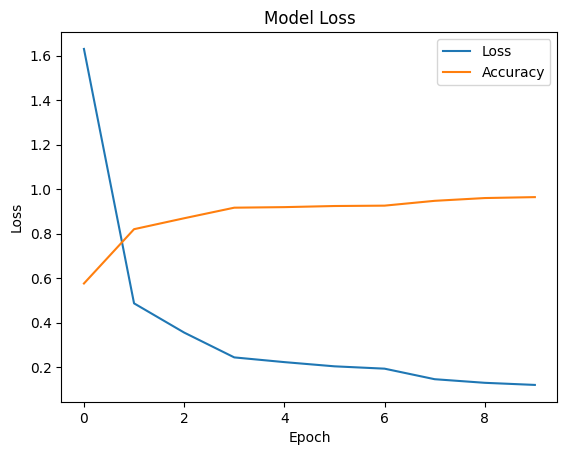

In [ ]:
# Plot training & validation loss values
plt.plot(compare3_2.history['loss'])
plt.plot(compare3_2.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **3.3 Activation function = "Relu" ,Optimizer = "RMSprop"**

In [ ]:
model3_3=models.Sequential([
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(4,activation="softmax")
])
model3_3.compile(optimizer="RMSprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
compare3_3 = model3_3.fit(x_train_scaled,np.array(y_train),epochs=10,callbacks=[callbacks])

Epoch 1/10
38/38 [==============================] - 5s 97ms/step - loss: 3.6198 - accuracy: 0.5833
Epoch 2/10
38/38 [==============================] - 3s 86ms/step - loss: 0.5242 - accuracy: 0.8142
Epoch 3/10
38/38 [==============================] - 3s 87ms/step - loss: 0.4310 - accuracy: 0.8625
Epoch 4/10
38/38 [==============================] - 5s 128ms/step - loss: 0.2234 - accuracy: 0.9275
Epoch 5/10
38/38 [==============================] - 5s 140ms/step - loss: 0.2281 - accuracy: 0.9358
Epoch 6/10
38/38 [==============================] - 4s 99ms/step - loss: 0.1388 - accuracy: 0.9617
Epoch 7/10
38/38 [==============================] - 3s 88ms/step - loss: 0.1231 - accuracy: 0.9608
Epoch 8/10
38/38 [==============================] - 5s 131ms/step - loss: 0.1722 - accuracy: 0.9517
Epoch 9/10
38/38 [==============================] - 6s 146ms/step - loss: 0.0684 - accuracy: 0.9775
Epoch 10/10
38/38 [==============================] - 5s 134ms/step - loss: 0.1622 - accuracy: 0.9642


In [ ]:
model3_3.evaluate(x_test_scaled,np.array(y_test))

13/13 [==============================] - 1s 44ms/step - loss: 0.0012 - accuracy: 1.0000


[0.0012446870096027851, 1.0]

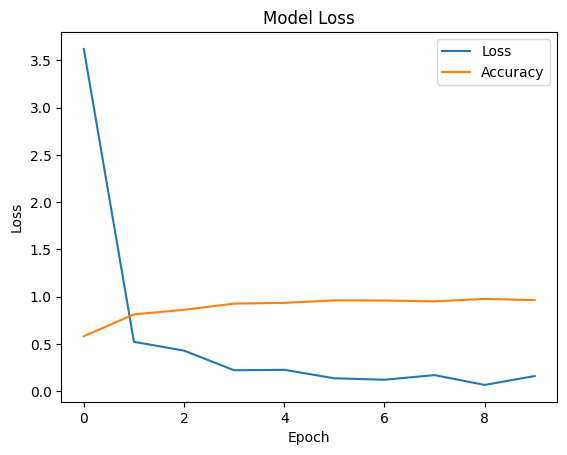

In [ ]:
# Plot training & validation loss values
plt.plot(compare3_3.history['loss'])
plt.plot(compare3_3.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **3.4 Activation function = "Relu" ,Optimizer = "SGD"**

In [ ]:
model3_4=models.Sequential([
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(32,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(4,activation="softmax")
])
model3_4.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
compare3_4 = model3_4.fit(x_train_scaled,np.array(y_train),epochs=10,callbacks=[callbacks])

Epoch 1/10
38/38 [==============================] - 4s 87ms/step - loss: 1.0736 - accuracy: 0.5450
Epoch 2/10
38/38 [==============================] - 3s 85ms/step - loss: 0.5984 - accuracy: 0.7742
Epoch 3/10
38/38 [==============================] - 2s 60ms/step - loss: 0.3751 - accuracy: 0.8775
Epoch 4/10
38/38 [==============================] - 2s 48ms/step - loss: 0.2466 - accuracy: 0.9217
Epoch 5/10
38/38 [==============================] - 2s 49ms/step - loss: 0.1799 - accuracy: 0.9458
Epoch 6/10
38/38 [==============================] - 2s 48ms/step - loss: 0.1365 - accuracy: 0.9658
Epoch 7/10
38/38 [==============================] - 2s 48ms/step - loss: 0.1327 - accuracy: 0.9642
Epoch 8/10
38/38 [==============================] - 2s 51ms/step - loss: 0.1191 - accuracy: 0.9683
Epoch 9/10
38/38 [==============================] - 3s 84ms/step - loss: 0.0930 - accuracy: 0.9758
Epoch 10/10
38/38 [==============================] - 3s 83ms/step - loss: 0.0790 - accuracy: 0.9783


In [ ]:
model3_4.evaluate(x_test_scaled,np.array(y_test))

13/13 [==============================] - 1s 72ms/step - loss: 0.0083 - accuracy: 1.0000


[0.008274639025330544, 1.0]

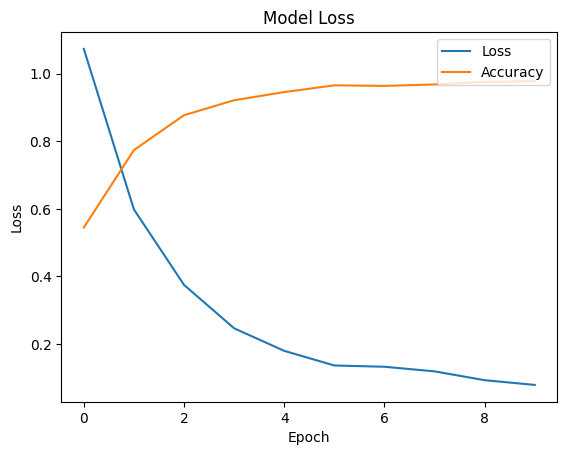

In [ ]:
# Plot training & validation loss values
plt.plot(compare3_4.history['loss'])
plt.plot(compare3_4.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **3.5 Activation function = "Relu" ,Optimizer = "AdaDelta"**

In [ ]:
model3_5=models.Sequential([
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(4,activation="softmax")
])
model3_5.compile(optimizer="adadelta",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
compare3_5 = model3_5.fit(x_train_scaled,np.array(y_train),epochs=10,callbacks=[callbacks])

Epoch 1/10
38/38 [==============================] - 6s 131ms/step - loss: 1.3506 - accuracy: 0.3442
Epoch 2/10
38/38 [==============================] - 4s 104ms/step - loss: 1.2563 - accuracy: 0.4425
Epoch 3/10
38/38 [==============================] - 4s 111ms/step - loss: 1.1913 - accuracy: 0.5000
Epoch 4/10
38/38 [==============================] - 6s 163ms/step - loss: 1.1115 - accuracy: 0.5783
Epoch 5/10
38/38 [==============================] - 5s 143ms/step - loss: 1.0667 - accuracy: 0.6067
Epoch 6/10
38/38 [==============================] - 4s 106ms/step - loss: 1.0214 - accuracy: 0.6383
Epoch 7/10
38/38 [==============================] - 4s 104ms/step - loss: 0.9697 - accuracy: 0.6617
Epoch 8/10
38/38 [==============================] - 6s 165ms/step - loss: 0.9284 - accuracy: 0.6900
Epoch 9/10
38/38 [==============================] - 6s 147ms/step - loss: 0.8953 - accuracy: 0.7183
Epoch 10/10
38/38 [==============================] - 4s 103ms/step - loss: 0.8616 - accuracy: 0.7325

In [ ]:
model3_5.evaluate(x_test_scaled,np.array(y_test))

13/13 [==============================] - 1s 44ms/step - loss: 0.7544 - accuracy: 0.9125


[0.7544010877609253, 0.9125000238418579]

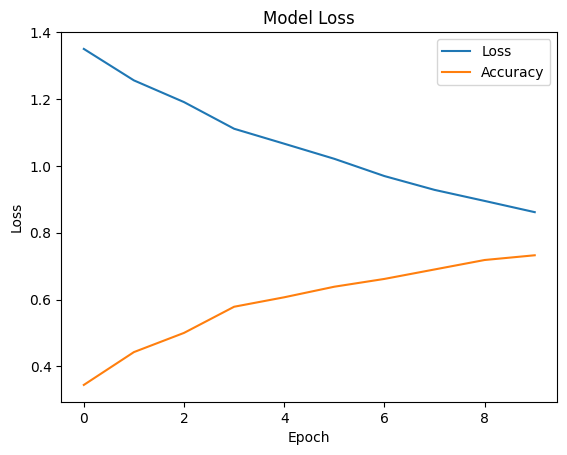

In [ ]:
# Plot training & validation loss values
plt.plot(compare3_5.history['loss'])
plt.plot(compare3_5.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **4. CNN Model only with Augumentation layers**

# **4.1 Activation function = "Relu" ,Optimizer = "Adam"**

In [ ]:
model4_1=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(4,activation="softmax")
])
model4_1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
compare4_1 = model4_1.fit(x_train_scaled,np.array(y_train),epochs=10,callbacks=[callbacks])

Epoch 1/10
38/38 [==============================] - 60s 1s/step - loss: 1.2613 - accuracy: 0.5175
Epoch 2/10
38/38 [==============================] - 58s 2s/step - loss: 0.5055 - accuracy: 0.8133
Epoch 3/10
38/38 [==============================] - 59s 2s/step - loss: 0.2984 - accuracy: 0.8950
Epoch 4/10
38/38 [==============================] - 60s 2s/step - loss: 0.1598 - accuracy: 0.9475
Epoch 5/10
38/38 [==============================] - 63s 2s/step - loss: 0.1114 - accuracy: 0.9725
Epoch 6/10
38/38 [==============================] - 59s 2s/step - loss: 0.0866 - accuracy: 0.9750
Epoch 7/10
38/38 [==============================] - 57s 2s/step - loss: 0.0650 - accuracy: 0.9775
Epoch 8/10
38/38 [==============================] - 58s 2s/step - loss: 0.0676 - accuracy: 0.9850
Epoch 9/10
38/38 [==============================] - 59s 2s/step - loss: 0.0660 - accuracy: 0.9825
Epoch 10/10
38/38 [==============================] - 60s 2s/step - loss: 0.0375 - accuracy: 0.9867


In [ ]:
model4_1.evaluate(x_test_scaled,np.array(y_test))

13/13 [==============================] - 4s 322ms/step - loss: 0.1027 - accuracy: 0.9650


[0.10268256068229675, 0.9649999737739563]

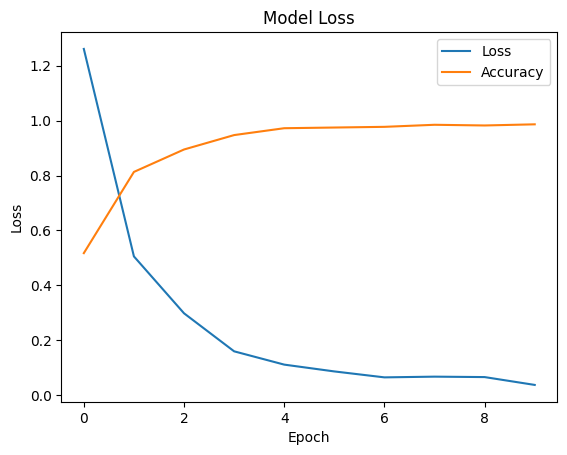

In [ ]:
# Plot training & validation loss values
plt.plot(compare4_1.history['loss'])
plt.plot(compare4_1.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **4.2 Activation function = "Relu" ,Optimizer = "Adamax"**

In [ ]:
model4_2=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(4,activation="softmax")
])
model4_2.compile(optimizer="adamax",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
compare4_2 = model4_2.fit(x_train_scaled,np.array(y_train),epochs=10,callbacks=[callbacks])

Epoch 1/10
38/38 [==============================] - 63s 2s/step - loss: 1.5920 - accuracy: 0.4075
Epoch 2/10
38/38 [==============================] - 61s 2s/step - loss: 0.7551 - accuracy: 0.7092
Epoch 3/10
38/38 [==============================] - 60s 2s/step - loss: 0.5737 - accuracy: 0.7892
Epoch 4/10
38/38 [==============================] - 64s 2s/step - loss: 0.4547 - accuracy: 0.8483
Epoch 5/10
38/38 [==============================] - 61s 2s/step - loss: 0.3459 - accuracy: 0.8775
Epoch 6/10
38/38 [==============================] - 60s 2s/step - loss: 0.3163 - accuracy: 0.8800
Epoch 7/10
38/38 [==============================] - 60s 2s/step - loss: 0.2157 - accuracy: 0.9308
Epoch 8/10
38/38 [==============================] - 59s 2s/step - loss: 0.1991 - accuracy: 0.9458
Epoch 9/10
38/38 [==============================] - 61s 2s/step - loss: 0.1513 - accuracy: 0.9558
Epoch 10/10
38/38 [==============================] - 61s 2s/step - loss: 0.1344 - accuracy: 0.9642


In [ ]:
model4_2.evaluate(x_test_scaled,np.array(y_test))

13/13 [==============================] - 6s 458ms/step - loss: 0.0869 - accuracy: 0.9725


[0.08689376711845398, 0.9725000262260437]

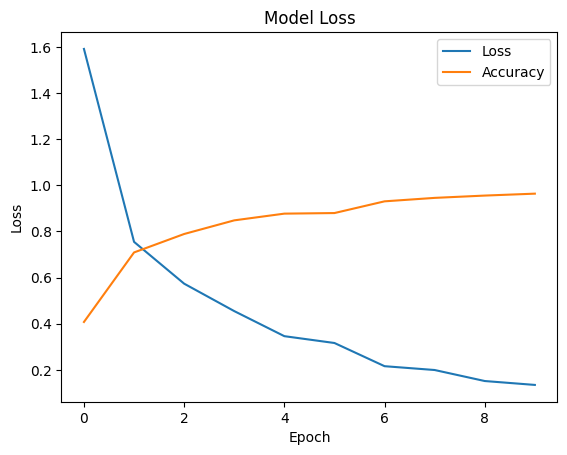

In [ ]:
# Plot training & validation loss values
plt.plot(compare4_2.history['loss'])
plt.plot(compare4_2.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **4.3 Activation function = "Relu" ,Optimizer = "RMSprop"**

In [ ]:
model4_3=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(4,activation="softmax")
])
model4_3.compile(optimizer="RMSprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
compare4_3 = model4_3.fit(x_train_scaled,np.array(y_train),epochs=10,callbacks=[callbacks])

Epoch 1/10
38/38 [==============================] - 61s 2s/step - loss: 3.1207 - accuracy: 0.3783
Epoch 2/10
38/38 [==============================] - 57s 1s/step - loss: 1.0253 - accuracy: 0.5517
Epoch 3/10
38/38 [==============================] - 58s 2s/step - loss: 0.7595 - accuracy: 0.6867
Epoch 4/10
38/38 [==============================] - 58s 2s/step - loss: 0.5791 - accuracy: 0.7750
Epoch 5/10
38/38 [==============================] - 58s 2s/step - loss: 0.4179 - accuracy: 0.8633
Epoch 6/10
38/38 [==============================] - 58s 2s/step - loss: 0.2701 - accuracy: 0.8942
Epoch 7/10
38/38 [==============================] - 57s 2s/step - loss: 0.2303 - accuracy: 0.9225
Epoch 8/10
38/38 [==============================] - 57s 1s/step - loss: 0.1860 - accuracy: 0.9375
Epoch 9/10
38/38 [==============================] - 56s 1s/step - loss: 0.1398 - accuracy: 0.9467
Epoch 10/10
38/38 [==============================] - 57s 1s/step - loss: 0.0838 - accuracy: 0.9725


In [ ]:
model4_3.evaluate(x_test_scaled,np.array(y_test))

13/13 [==============================] - 8s 582ms/step - loss: 0.0351 - accuracy: 0.9950


[0.035088539123535156, 0.9950000047683716]

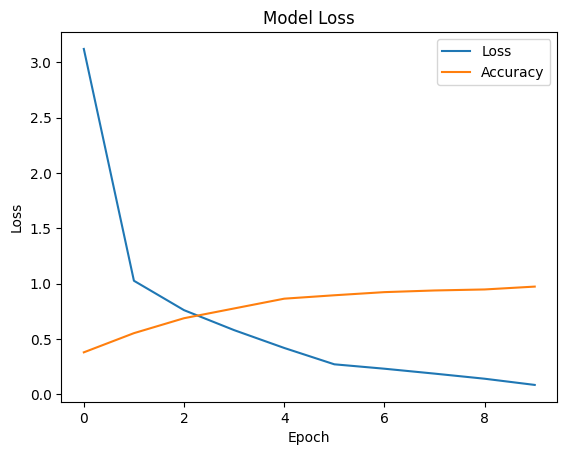

In [ ]:
# Plot training & validation loss values
plt.plot(compare4_3.history['loss'])
plt.plot(compare4_3.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **4.4 Activation function = "Relu" ,Optimizer = "SGD"**

In [ ]:
model4_4=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(4,activation="softmax")
])
model4_4.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
compare4_4 = model4_4.fit(x_train_scaled,np.array(y_train),epochs=10,callbacks=[callbacks])

Epoch 1/10
38/38 [==============================] - 49s 1s/step - loss: 1.2596 - accuracy: 0.4300
Epoch 2/10
38/38 [==============================] - 50s 1s/step - loss: 1.0354 - accuracy: 0.5717
Epoch 3/10
38/38 [==============================] - 49s 1s/step - loss: 0.8152 - accuracy: 0.6817
Epoch 4/10
38/38 [==============================] - 51s 1s/step - loss: 0.7056 - accuracy: 0.7358
Epoch 5/10
38/38 [==============================] - 49s 1s/step - loss: 0.5163 - accuracy: 0.8117
Epoch 6/10
38/38 [==============================] - 50s 1s/step - loss: 0.4851 - accuracy: 0.8075
Epoch 7/10
38/38 [==============================] - 58s 2s/step - loss: 0.3844 - accuracy: 0.8500
Epoch 8/10
38/38 [==============================] - 48s 1s/step - loss: 0.3698 - accuracy: 0.8600
Epoch 9/10
38/38 [==============================] - 52s 1s/step - loss: 0.2867 - accuracy: 0.8975
Epoch 10/10
38/38 [==============================] - 48s 1s/step - loss: 0.2272 - accuracy: 0.9250


In [ ]:
model4_4.evaluate(x_test_scaled,np.array(y_test))

13/13 [==============================] - 7s 572ms/step - loss: 0.1272 - accuracy: 0.9750


[0.12721364200115204, 0.9750000238418579]

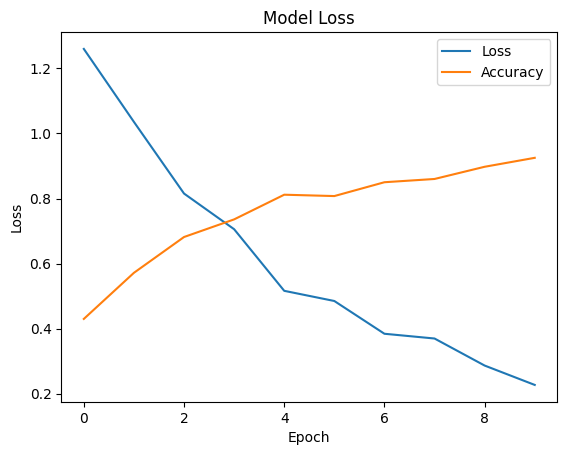

In [ ]:
# Plot training & validation loss values
plt.plot(compare4_4.history['loss'])
plt.plot(compare4_4.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()